# Sesión 14: Caso Práctico

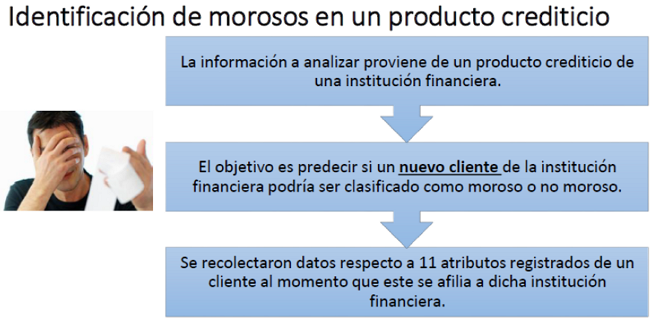

Veamos la descripción de algunas variables, ya que será útil para la descripción de los resultados:

***antiguedad (antigüedad del cliente):* numérico en meses** <br>
***nrodepen (número de dependientes):* numérico en cantidad** <br>
***sexo:* 1 (Masculino), 2 (Femenino)** <br>
***fonopart (Si tiene teléfono particular):* 1 (No), 2 (Si)** <br>
***fonolab (Si tiene teléfono laboral):* 1 (No), 2 (Si)** <br>
***autovaluo (Si tiene autovaluo):* 1 (No), 2 (Si)** <br>
***esaval (Si puede ser aval):* 1 (No), 2 (Si)** <br>
***tieneaval (Si tiene aval):* 1 (No), 2 (Si)** <br>
***tiporenta (tipo de ingreso):* 2 (Fijo), 3 (Variable)** <br>
***dpto (Departamento de residencia):* 1 (Lima), 2 (Trujillo), 3 (Arequipa), 4 (Cusco), 5 (Ica), 6 (Piura)** <br>
***morosidad (variable target):* 1 (No moroso), 2 (Moroso)**

### **Ejercicio 1**
Cargar los datos de la base **Riesgo_morosidad.csv** y realizar un análisis descriptivo y gráfico. Considerar la descripción de las variables para agregar comentarios.

In [ ]:
#Inserte su respuesta aquí
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc


In [ ]:
df = pd.read_csv("data/Riesgo_morosidad.csv",delimiter=';')
df.head()

In [ ]:
print('Dimensión de la bd:', df.shape, '\n')

print(df.dtypes)

In [ ]:
df['Target'] = df['morosidad']

In [ ]:
pd.crosstab(df.Target,df.morosidad)

In [ ]:
df.head()

In [ ]:

sns.catplot('Target', data = df, kind = 'count')
plt.show()

In [ ]:
df.describe()

In [ ]:
df.edad.hist()
plt.show()

In [ ]:
df.nrodepen.hist()
plt.show()

In [ ]:
df.dpto.hist()
plt.show()

In [ ]:
df.antiguedad.hist()
plt.show()

In [ ]:
sns.pairplot(df.iloc[:, 0:4])

In [ ]:
sns.pairplot(df.iloc[:, 4:8])

In [ ]:
sns.pairplot(df.iloc[:, 8:12])

In [ ]:
sns.boxplot(y = df.edad, x = df.Target)
plt.show()

In [ ]:
sns.boxplot(y = df.nrodepen, x = df.Target)
plt.show()

In [ ]:
sns.boxplot(y = df.dpto, x = df.Target)
plt.show()

In [ ]:
sns.boxplot(y = df.antiguedad, x = df.Target)
plt.show()

In [ ]:
df.dtypes

### **Ejercicio 2**

Realice el tratamiento de datos de tal forma que obtenga el dataset listo para la fase de modelamiento. Realice cruces entre las variables para ver cuales están más relacionadas con el target. Finalmente divida el dataset entre train y test. 

In [ ]:
df

In [ ]:
#Inserte su respuesta aquí
df.drop('morosidad', axis = 1, inplace= True)

In [ ]:
df.head()

In [ ]:
df['edad'].value_counts()

In [ ]:
df['nrodepen'].value_counts()

In [ ]:
df['dpto'].value_counts()

In [ ]:
df['antiguedad'].value_counts()

In [ ]:
for x in ['edad','nrodepen','dpto','antiguedad']:
    sns.catplot(x, data=df, hue='Target', kind='count')
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)


In [ ]:
df.isnull().sum()

In [ ]:
df = pd.get_dummies(df, drop_first= True)
df.head()

In [ ]:
X = df.drop(['Target'], axis = 1)
Y = df['Target']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### **Ejercicio 3**
Realice modelos de predicción usando los algoritmos que hemos visto en clase. Compare al menos 2 modelos distintos de clasificación con diferentes hiperparámetros de ser posible.

In [ ]:
#Inserte su respuesta aquí
tree = DecisionTreeClassifier()

In [ ]:
#Entrenamiento del arbol (data de train)

tree_model = tree.fit(X_train, Y_train)

In [ ]:
#Importancia de variables

pd.Series(data=tree_model.feature_importances_, index=X.columns)

### **Ejercicio 4**
Genere las predicciones con la data test y evalúe los resultados.

In [ ]:
#Inserte su respuesta aquí
#Predicción del modelo (data de test)

Y_pred = tree_model.predict(X_test)

In [ ]:
Y_pred[:5]

In [ ]:
np.array(Y_test[:5])

### **Ejercicio 5**
Revise las métricas correspondientes. ¿Qué algoritmo y con qué hiperparámetros obtuvo mejor resultado?

In [ ]:
#Inserte su respuesta aquí

#Cálculo del accuracy (data de test)

accuracy_score(Y_test, Y_pred)

In [ ]:
#Matriz de confusión (data de test)

confusion_matrix(Y_test, Y_pred)

In [ ]:
#AUC (data de test)

fpr, tpr, threshold = roc_curve(Y_test, Y_pred)
auc(fpr, tpr)

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import Image
from pydotplus import graph_from_dot_data

In [ ]:
dot_data = export_graphviz(tree_model, filled = True,
                           feature_names=X.columns,
                          special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
Image(graph.create_png())

In [ ]:
tree2 = DecisionTreeClassifier(max_depth = 3)
tree_model2 = tree2.fit(X_train, Y_train)

In [ ]:
Y_pred = tree_model2.predict(X_test)
accuracy_score(Y_test, Y_pred)

In [ ]:
confusion_matrix(Y_test, Y_pred)

In [ ]:
fpr, tpr, threshold = roc_curve(Y_test, Y_pred)
auc(fpr, tpr)


In [ ]:
dot_data = export_graphviz(tree_model2, filled = True,
                           feature_names=X.columns,
                          special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree2.png')
Image(graph.create_png())